In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.read_csv('bank_data.csv')

data['level_0_indicator'] = (data['recovery_strategy'] == 0).astype(int)

threshold = 1000

data['above_threshold'] = (data['expected_recovery_amount'] > threshold).astype(int)

data['interaction'] = data['level_0_indicator'] * data['above_threshold']

X = data[['level_0_indicator', 'above_threshold', 'interaction']]
X = sm.add_constant(X)
y = data['actual_recovery_amount']

model = sm.OLS(y, X).fit()

print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.087
Model:                                OLS   Adj. R-squared:                  0.087
Method:                     Least Squares   F-statistic:                     180.0
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):           2.87e-39
Time:                            11:06:24   Log-Likelihood:                -18447.
No. Observations:                    1882   AIC:                         3.690e+04
Df Residuals:                        1880   BIC:                         3.691e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

C:\Users\Fast Computers\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


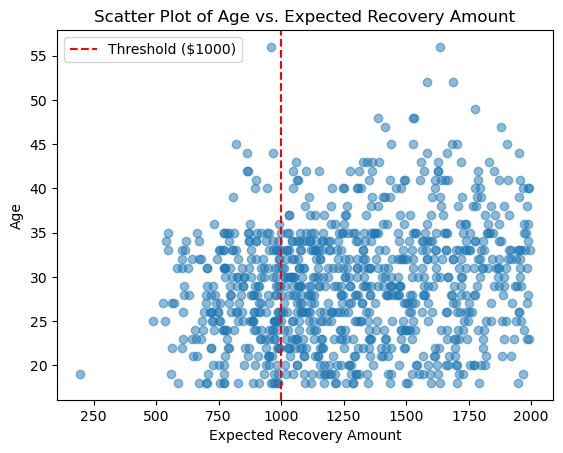

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('bank_data.csv')

threshold_0 = 0
threshold_1 = 1000
max_expected_recovery = 2000

data_filtered = data[(data['expected_recovery_amount'] >= threshold_0) & (data['expected_recovery_amount'] <= max_expected_recovery)]

plt.scatter(data_filtered['expected_recovery_amount'], data_filtered['age'], alpha=0.5)
plt.axvline(x=threshold_1, color='red', linestyle='--', label='Threshold ($1000)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs. Expected Recovery Amount')
plt.legend()

plt.show()


In [4]:
import pandas as pd
from scipy.stats import ttest_ind

data = pd.read_csv('bank_data.csv')

threshold = 1000

data_below_threshold = data[data['expected_recovery_amount'] < threshold]
data_above_threshold = data[data['expected_recovery_amount'] >= threshold]

ages_below_threshold = data_below_threshold['age']
ages_above_threshold = data_above_threshold['age']

t_stat, p_value = ttest_ind(ages_below_threshold, ages_above_threshold)

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('There is a significant difference in the average age between the two groups.')
else:
    print('There is no significant difference in the average age between the two groups.')


T-test statistic: -13.726414109834245
P-value: 6.192447721152697e-41
There is a significant difference in the average age between the two groups.


In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

data = pd.read_csv('bank_data.csv')

threshold = 1000

data['above_threshold'] = (data['expected_recovery_amount'] >= threshold).astype(int)

contingency_table = pd.crosstab(data['sex'], data['above_threshold'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('There is a significant difference in the percentage of male customers between the two groups.')
else:
    print('There is no significant difference in the percentage of male customers between the two groups.')


Chi-square statistic: 1.9933738210978316
P-value: 0.1579885633219678
There is no significant difference in the percentage of male customers between the two groups.


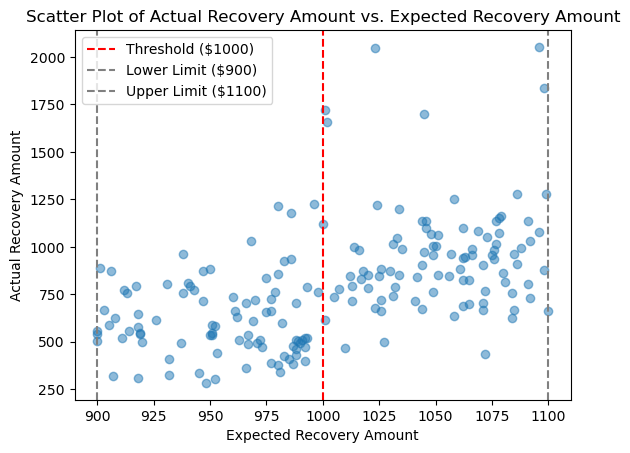

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('bank_data.csv')

threshold_0 = 900
threshold_1 = 1000
threshold_2 = 1100

data_filtered = data[(data['expected_recovery_amount'] >= threshold_0) & (data['expected_recovery_amount'] <= threshold_2)]

plt.scatter(data_filtered['expected_recovery_amount'], data_filtered['actual_recovery_amount'], alpha=0.5)
plt.axvline(x=threshold_1, color='red', linestyle='--', label='Threshold ($1000)')
plt.axvline(x=threshold_0, color='gray', linestyle='--', label='Lower Limit ($900)')
plt.axvline(x=threshold_2, color='gray', linestyle='--', label='Upper Limit ($1100)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Scatter Plot of Actual Recovery Amount vs. Expected Recovery Amount')
plt.legend()
plt.show()

